# Implementation of Linear Regression

## Introduction
In linear regression, we have an $ n \times p$ matrix $\mathbf{X}=(x_{ij})$, the predictors or design matrix, and an $n\times 1$ vector $\mathbf{Y} = (y_i)$, the outcomes. We model $y_i$ as:
$$ y_i = \sum_{j=1}^p x_{ij}\beta_j+\epsilon_{i}$$
for $i = 1, 2, ..., n$ and $\epsilon_i \sim N(0,\sigma^2)$. If $x_{i1}$ is a constant for all $i$ then $\beta_1$ is the intercept term.

Linear regression performs a least squares estimate of these coefficients in order to explain the relationship between the predictors and the outcome as well as predict the outcome in new scenarios.

The linear regression model in matrix form can be rewritten as $$\mathbf{Y} = \mathbf{X}^T \beta + \epsilon$$
The least squares estimate of $\beta$ is $$\widehat{\beta} = \arg \min_\beta || \mathbf{Y} - \mathbf{X}||_{l_2}^2 = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{Y}$$

For the matrix solutions it is useful to thing about a matrix $\mathbf{Z} = [\mathbf{X}\mathbf{Y}]$, and let 
$$ A = \mathbf{Z}^T\mathbf{Z} =  
\begin{bmatrix}
    \mathbf{X}^T\mathbf{X} & \mathbf{X}^T\mathbf{Y} \\
    \mathbf{Y}^T\mathbf{X}& \mathbf{Y}^T\mathbf{Y} \\
\end{bmatrix}$$

## In this Demo
We implement Linear Regression using two different methods: Gauss Jordan Elimination and Sweep Operators. Additionally, we compare the method to the estimates from sklearn to validate our results

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

from LR_GaussJordan import *
from Sweep_LM import *

## Demo with the Diabetes Data Set

We look at the diabetes data set with a quantitative diabetes outcome variable and 12 predictors (S1-S6 are six blood serums: map tc ldl hdl tch ltg glu y)
- Age
- Sex
- Body mass index
- Average blood pressure
- S1, S2, S3, S4, S5, S6

In [2]:
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

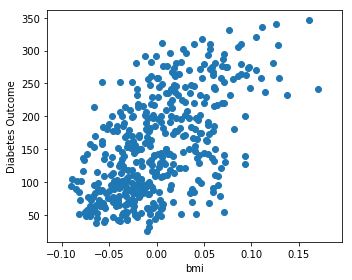

In [3]:
plt.figure(figsize=(5, 4))
plt.scatter(diabetes.data[:, 2], diabetes.target)
plt.xlabel(diabetes.feature_names[2])
plt.ylabel("Diabetes Outcome")

plt.tight_layout()
plt.show()

## Linear Regression using Packages in Python

In [4]:
# Create a linear regression object
regr = linear_model.LinearRegression()

# Fit the linear regression to our data
regr.fit(X, y)

# Print model coefficients and intercept
print("Intercept: \n", regr.intercept_)
print("Coefficients: \n", regr.coef_)

Intercept: 
 152.1334841628965
Coefficients: 
 [ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]


## Linear Regression Using Gaussian Elimination
For a system of linear equations $Ax=b$ we can solve $x=A^{-1}b$ using Gauss Jordan Elimination. We can apply Gauss Jordan sequentially for rows $1:m$
$$FJ[1:m]\begin{bmatrix}
    \mathbf{A}_{11} & \mathbf{A}_{12}&|& I_1 & 0\\
    \mathbf{A}_{21}& \mathbf{A}_{22} &|& 0 & I_2\\
\end{bmatrix} = 
\begin{bmatrix}
    I_1 & \mathbf{A}_{11}^{-1}\mathbf{A}_{12}&|&  \mathbf{A}_{11}^{-1} & 0\\
    0& \mathbf{A}_{22}-\mathbf{A}_{21}\mathbf{A}_{11}^{-1}\mathbf{A}_{12} &|& -\mathbf{A}_{21}\mathbf{A}_{11}^{-1} & I_2\\
\end{bmatrix}$$




In [5]:
myLinearRegressionGJ(X, y)

array([ 152.13348416,  -10.01219782, -239.81908937,  519.83978679,
        324.39042769, -792.18416163,  476.74583782,  101.04457032,
        177.06417623,  751.27932109,   67.62538639])

## Linear Regression with the Sweep Operator
The sweep operator is another convenient tool for linear regression where 

$$SW[1:m]\begin{bmatrix}
    -\mathbf{A}_{11}^{-1} & \mathbf{A}_{11}^{-1}\mathbf{A}_{12}\\
    \mathbf{A}_{21}\mathbf{A}_{11}^{-1}& \mathbf{A}_{22}-\mathbf{A}_{21}\mathbf{A}_{11}^{-1}\mathbf{A}_{12}\\
\end{bmatrix}$$

and $\mathbf{A}_{11}^{-1}\mathbf{A}_{12}$ yields the vector $\widehat{\beta}$

In [6]:
myLinearRegressionSweep(X, y)

array([ 152.13348416,  -10.01219782, -239.81908937,  519.83978679,
        324.39042769, -792.18416163,  476.74583782,  101.04457032,
        177.06417623,  751.27932109,   67.62538639])